# Preparation code

In [1]:
import numpy as np
from scipy.integrate import odeint as ODEint

def D5(y, x):
    A = -(y[0]**2 + y[1]**2)**-1.5
    return [y[2],  y[3],  A*y[0],  A*y[1]] # dimensionless orbit equation

ep5 = 0.9
y0_D5 = np.array([1.0-ep5, 0.0, 0.0, np.sqrt((1.0+ep5)/(1.0-ep5))], dtype='float64')

x = np.linspace(0, 20, 2001)

tol = 1E-12

# Python version

Populating the interactive namespace from numpy and matplotlib


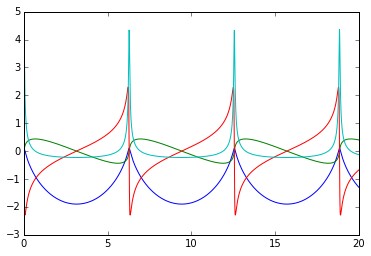

In [2]:
%pylab inline

import matplotlib.pyplot as plt

a, d = ODEint(D5, y0_D5, x, rtol=tol, atol = tol, full_output=True)
plt.figure()
for thing in a.T:
    plt.plot(x, thing)
plt.show()

# Cython version

In [3]:
%load_ext cython
# Only for iPython.

In [4]:
%%cython
# The above line is only for iPython notebook.  You don't need it in a Cython file.

cimport numpy as np

def D5cy(np.ndarray[double, ndim=1, mode="c"] y, # A convenient way to pass arrays into Cython is to use numpy.
         double x # Use double.
):
    cdef double A # Use double or you'll lose precision and get weird results.
    A = -(y[0]**2 + y[1]**2)**-1.5
    return [y[2],  y[3],  A*y[0],  A*y[1]] # dimensionless orbit equation

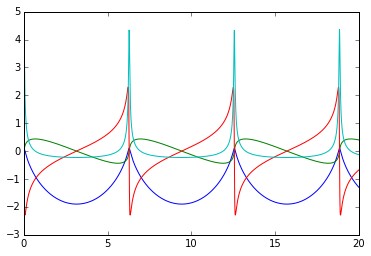

In [5]:
a, d = ODEint(D5cy, y0_D5, x, rtol=tol, atol = tol, full_output=True)
plt.figure()
for thing in a.T:
    plt.plot(x, thing)
plt.show()